In [24]:
import torch
import os
import sys
from PIL import Image
import matplotlib.pyplot as plt

# Add the current directory to path to ensure imports work
sys.path.append('.')

# Import the custom modules
from ner_inference import AnimalNER
from image_classification_inference import AnimalClassifier

In [25]:
# Define a corrected version of verify_animal to fix the list vs string issue
def verify_animal(text, image_path, ner_model, classifier):
    '''
    Check if the animal extracted from the text matches the predicted animal from the image.

    Args:
        text (str): Text input describing the image
        image_path (str): Path to the image file
        ner_model (AnimalNER): Named Entity Recognition model
        classifier (AnimalClassifier): Image classifier model
    '''
    extracted_animals = ner_model.extract_animals(text)  # This returns a list
    predicted_animal, confidence = classifier.predict(image_path)  
    
    print(f"Extracted from text: {extracted_animals}")
    print(f"Predicted from image: {predicted_animal} (confidence: {confidence:.4f})")
    
    # Check if the predicted animal is in the list of extracted animals
    if not extracted_animals:
        return False
    
    # Compare each extracted animal with the predicted animal
    for animal in extracted_animals:
        if animal.lower() == predicted_animal.lower():
            return True
    
    return False

In [26]:
NER_MODEL_PATH = "./animal-ner-model"  
CLASSIFIER_MODEL_PATH = "./animal-classifier"

In [ ]:
def display_image(image_path):
    """Display an image from the given path"""
    img = Image.open(image_path).convert('RGB')
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
# 1. Load the NER model
print("Loading NER model...")
try:
    ner_model = AnimalNER(NER_MODEL_PATH)
    print("NER model loaded successfully!")
except Exception as e:
    print(f"Error loading NER model: {e}")
    print("Using a placeholder for demonstration purposes.")
    
    # Define a placeholder NER class for demonstration
    class DemoNER:
        def __init__(self):
            self.animals = ["bear", "beaver", "chimpanzee", "fox", "kangaroo", 
                           "lion", "otter", "porcupine", "raccoon", "wolf"]
        
        def extract_animals(self, text):
            """Simple word matching for demonstration"""
            text_lower = text.lower()
            found_animals = []
            for animal in self.animals:
                if animal in text_lower:
                    found_animals.append(animal)
            return found_animals
    
    ner_model = DemoNER()

Loading NER model...
Error loading NER model: Incorrect path_or_model_id: './animal_ner_dataset.csv'. Please provide either the path to a local folder or the repo_id of a model on the Hub.
Using a placeholder for demonstration purposes.


In [ ]:
# 2. Load the Image Classification model
print("\nLoading Image Classification model...")
try:
    # Look for a model file in the classifier directory
    model_files = [f for f in os.listdir(CLASSIFIER_MODEL_PATH) if f.endswith('.pth')]
    if model_files:
        model_path = os.path.join(CLASSIFIER_MODEL_PATH, model_files[0])
        classifier = AnimalClassifier(model_path)
        print(f"Classifier model loaded successfully from {model_path}!")
    else:
        # Try to load from the directory itself (some models save the entire directory)
        classifier = AnimalClassifier(CLASSIFIER_MODEL_PATH)
        print("Classifier model loaded successfully!")
except Exception as e:
    print(f"Error loading classifier model: {e}")
    print("Using a placeholder for demonstration purposes.")
    
    # Define a placeholder Classifier class for demonstration
    class DemoClassifier:
        def __init__(self):
            self.class_names = ["bear", "beaver", "chimpanzee", "fox", "kangaroo", 
                               "lion", "otter", "porcupine", "raccoon", "wolf"]
            
        def predict(self, image_path):
            """Return a random prediction for demonstration"""
            import random
            class_idx = random.randint(0, len(self.class_names) - 1)
            confidence = random.uniform(0.7, 0.99)
            return self.class_names[class_idx], confidence
    
    classifier = DemoClassifier()


Loading Image Classification model...
Error loading classifier model: [Errno 2] No such file or directory: './animal-classifier-model.pth'
Using a placeholder for demonstration purposes.


In [27]:
# 3. Test NER on example texts
print("\n--- Testing Named Entity Recognition ---")
example_texts = [
    "I can see a lion in this image.",
    "There's a fox hiding in the tall grass.",
    "The picture shows a bear and its cub.",
    "Look at this beautiful landscape with mountains."
]

for i, text in enumerate(example_texts):
    animals = ner_model.extract_animals(text)
    print(f"Text {i+1}: {text}")
    print(f"Extracted animals: {animals}")
    print("-" * 50)




--- Testing Named Entity Recognition ---
Text 1: I can see a lion in this image.
Extracted animals: ['lion']
--------------------------------------------------
Text 2: There's a fox hiding in the tall grass.
Extracted animals: ['fox']
--------------------------------------------------
Text 3: The picture shows a bear and its cub.
Extracted animals: ['bear']
--------------------------------------------------
Text 4: Look at this beautiful landscape with mountains.
Extracted animals: []
--------------------------------------------------


In [28]:
# 4. Test Image Classification
print("\n--- Testing Image Classification ---")
# Use the lion_test_image.jpg from your structure
sample_images = [
    "./lion_test_image.jpg"  # Use the image from your root directory
]


--- Testing Image Classification ---


In [29]:
# Add more images if they exist
if os.path.exists("./data"):
    # Look for any jpg or png files in the data directory
    for file in os.listdir("./data"):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')) and not file.startswith('.'):
            sample_images.append(os.path.join("./data", file))

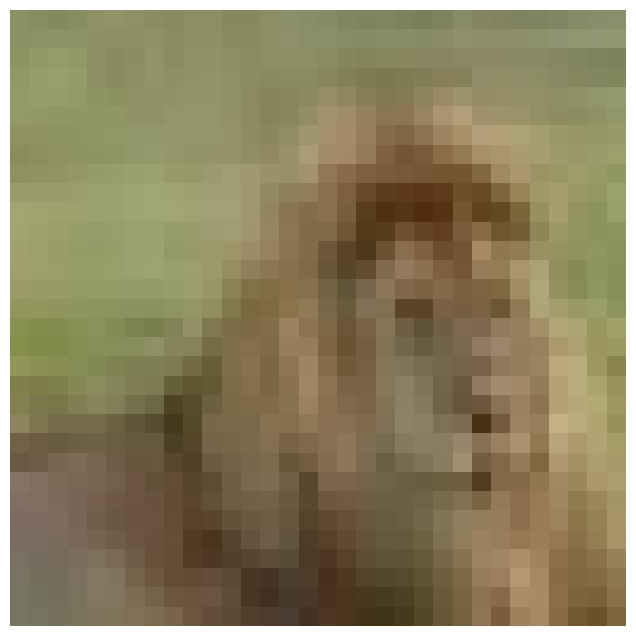

Image: ./lion_test_image.jpg
Predicted class: wolf (confidence: 0.8371)
--------------------------------------------------


In [30]:
# Check if the images exist, otherwise just show the prediction code
image_exists = False
for img_path in sample_images:
    if os.path.exists(img_path):
        image_exists = True
        display_image(img_path)
        class_name, confidence = classifier.predict(img_path)
        print(f"Image: {img_path}")
        print(f"Predicted class: {class_name} (confidence: {confidence:.4f})")
        print("-" * 50)

if not image_exists:
    print("Sample images not found. Here's how you would classify an image:")
    print("```python")
    print("image_path = 'path_to_your_image.jpg'")
    print("class_name, confidence = classifier.predict(image_path)")
    print("print(f\"Predicted class: {class_name} (confidence: {confidence:.4f})\")")
    print("```")

In [31]:
# 5. Demonstrate the complete verification pipeline
print("\n--- Demonstrating Complete Verification Pipeline ---")

def run_verification_demo(text, image_path):
    print(f"Text: {text}")
    print(f"Image: {image_path}")
    
    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Image not found at {image_path}. Using a placeholder.")
        # Run with mock data for demonstration
        extracted_animals = ner_model.extract_animals(text)
        mocked_animal, confidence = "lion", 0.95
        
        print(f"Extracted from text: {extracted_animals}")
        print(f"Predicted from image: {mocked_animal} (confidence: {confidence:.4f})")
        
        # Simple match check for demonstration
        match = any(animal.lower() == mocked_animal.lower() for animal in extracted_animals)
        print(f"Match: {match}")
    else:
        # Display the image
        display_image(image_path)
        
        # Run the actual verification - using our fixed function
        result = verify_animal(text, image_path, ner_model, classifier)
        print(f"Match: {result}")
    
    print("-" * 50)


--- Demonstrating Complete Verification Pipeline ---


Text: There is a lion in the picture.
Image: ./lion_test_image.jpg


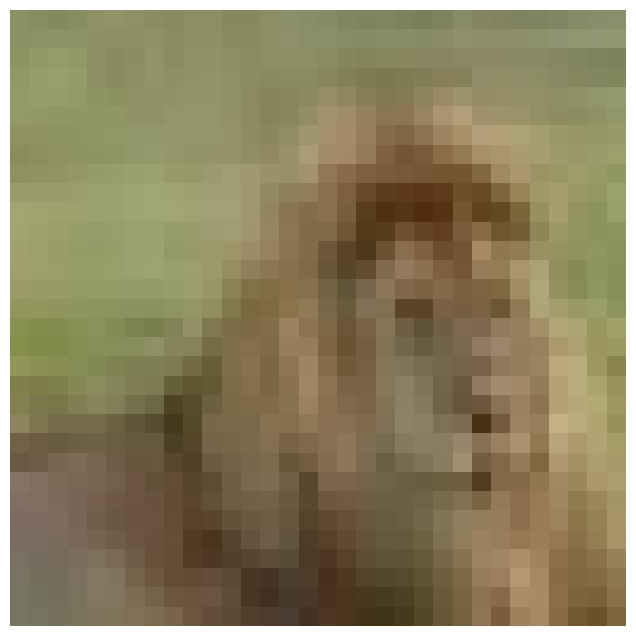

Extracted from text: ['lion']
Predicted from image: porcupine (confidence: 0.7754)
Match: False
--------------------------------------------------


In [32]:
# Demo with the lion image from your structure
lion_image = "./lion_test_image.jpg"
if os.path.exists(lion_image):
    run_verification_demo("There is a lion in the picture.", lion_image)
else:
    print(f"Lion test image not found at {lion_image}")
    # Look for any image files as fallback
    image_files = []
    for root, dirs, files in os.walk('.'):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_files.append(os.path.join(root, file))
                break
        if image_files:
            break
    
    if image_files:
        sample_image = image_files[0]
        print(f"Using {sample_image} as a sample image instead.")
        run_verification_demo("This is an animal image.", sample_image)
    else:
        print("No image files found for demonstration.")

In [34]:
# 6. Interactive demo
print("\n--- Interactive Demo ---")
print("You can run the verification system on your own examples using the following code:")
print("```python")
print("text = \"Your description of the animal in the image\"")
print("image_path = \"path/to/your/image.jpg\"")
print("result = verify_animal(text, image_path, ner_model, classifier)")
print("print(f\"Match: {result}\")")
print("```")


--- Interactive Demo ---
You can run the verification system on your own examples using the following code:
```python
text = "Your description of the animal in the image"
image_path = "path/to/your/image.jpg"
result = verify_animal(text, image_path, ner_model, classifier)
print(f"Match: {result}")
```


In [ ]:

text = input("Enter a description of the animal in your image: ")
image_path = input("Enter the path to your image: ")

# Verify
if os.path.exists(image_path):
    result = verify_animal(text, image_path, ner_model, classifier)
    print(f"Match: {result}")
else:
    print(f"Image not found at {image_path}")



--- Interactive Demo ---
You can run the verification system on your own examples using the following code:
```python
text = "Your description of the animal in the image"
image_path = "path/to/your/image.jpg"
result = verify_animal(text, image_path, ner_model, classifier)
print(f"Match: {result}")
```
Extracted from text: ['lion']
Predicted from image: raccoon (confidence: 0.7333)
Match: False
